Loading ../../datasets/rc_car/Stanmer_park_dataset/0511/dataset1
Loading ../../datasets/rc_car/Stanmer_park_dataset/0511/dataset2
Loading ../../datasets/rc_car/Stanmer_park_dataset/0511/dataset3
Loading ../../datasets/rc_car/Stanmer_park_dataset/0511/dataset4
Loading ../../datasets/rc_car/Stanmer_park_dataset/0511/dataset5
Loading ../../datasets/rc_car/Stanmer_park_dataset/0511/dataset6


Text(0.5, 1.0, 'Route paths (UTM coords in m)')

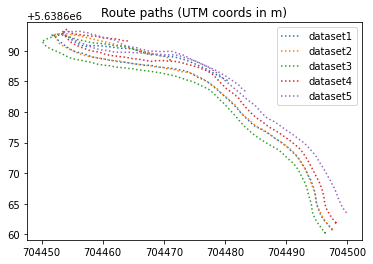

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import utm

def plot_route(ax, dpath):
    df = pd.read_csv(dpath + "/coordinates.csv")
    x = []
    y = []
    for lat, lon in zip(df['lat'], df['lon']):
        easting, northing, *_ = utm.from_latlon(lat, lon)
        x.append(easting)
        y.append(northing)

    ax.plot(x, y, ':')

_, ax = plt.subplots()
dbroot = '../../datasets/rc_car/Stanmer_park_dataset/0511'
i = 1
while True:
    dpath = '%s/dataset%d' % (dbroot, i)
    print('Loading ' + dpath)
    if not os.path.exists(dpath):
        break

    plot_route(ax, dpath)
    i += 1

ax.legend(['dataset%d' % num for num in range(1, i)])
ax.axis('equal')
ax.set_title('Route paths (UTM coords in m)')